In [1]:
#Model from the 2003 paper "EFFECTS OF FIRE AND HERBIVORY ON THE STABILITY OF SAVANNA ECOSYSTEMS"
#code modified from: http://systems-sciences.uni-graz.at/etextbook/sw2/phpl_python.html

In [1]:
%matplotlib inline

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import cnames
from matplotlib import animation

import numpy as np
from scipy import integrate

In [2]:
from ipywidgets import interact, interactive
from IPython.display import clear_output, display, HTML

In [3]:
#Define parameters
u=0.6;
rh=1.0;
rw=0.5;
dh=0.9; dw=0.4;
alpha=0.4;
beta=300;
p=1;
kh=0.1; #fire parameters are set to 0 in simplified model below
kw=0.01;
n=0.1;
a=0.5; 


In [43]:
#Three possible scenarios
#Scenario A: w_in=250 < beta
#Scenario B: w_in=500 > beta
#Scenario C: w_in =750 >> beta

scenario="C"


In [44]:
#Define scenario and resulting win (water in), ws, wt parameters (rate of water recharge)
if (scenario=="A"):
     win=250
elif (scenario=="B"):
     win=500
elif (scenario=="C"):
        win=700
        
def ws(alpha,beta,win):
    if win>beta:
        return alpha*(win-beta)
    else:
        return 0
    
ws=ws(alpha,beta,win)
wt=win-ws

print("Working with scenario "+str(scenario))
print("Water in: "+str(win))
print("Rate of moisture recharge in grass root zone: "+str(wt))
print("Rate of moisture recharge in tree root zone: "+str(ws))

Working with scenario C
Water in: 700
Rate of moisture recharge in grass root zone: 540.0
Rate of moisture recharge in tree root zone: 160.0


In [45]:
#Define simplified model
def H_dot(H,W):
    return rh*wt*(H)/(H+u*W+p*ws)-dh*H
def W_dot(H,W):
    return rw*(wt*(u*W)/(H+u*W+p*ws)+ws)-dw*W

#Define function to compute the state of the system at different time steps
#iv1, iv2 = initial values, dt = timestep, time = range
def sys(iv1, iv2, dt, time):
    # initial values:
    h.append(iv1)
    w.append(iv2)
    # compute and fill lists
    for i in range(time):
        h.append(h[i] + (H_dot(h[i],w[i])) * dt) #taylor series approximation truncated after linear terms
        w.append(w[i] + (W_dot(h[i],w[i])) * dt)
    return h, w


In [46]:
# initialize lists containing values
h = []
w = []
sys(500, 1000, 0.1, 750); #initializing with initial values for H,W, time step .1 years, 1000 years

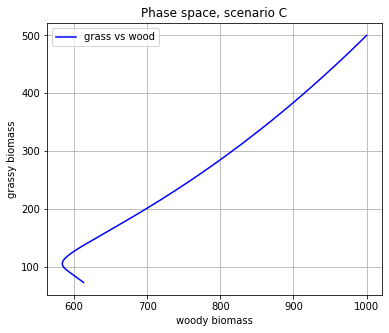

In [47]:
fig = plt.figure(figsize=(6,5))
plt.plot(w, h, 'b-', label='grass vs wood')
plt.title("Phase space, scenario "+str(scenario))
plt.legend(loc='best')
plt.xlabel("woody biomass")
plt.ylabel("grassy biomass")
plt.grid()


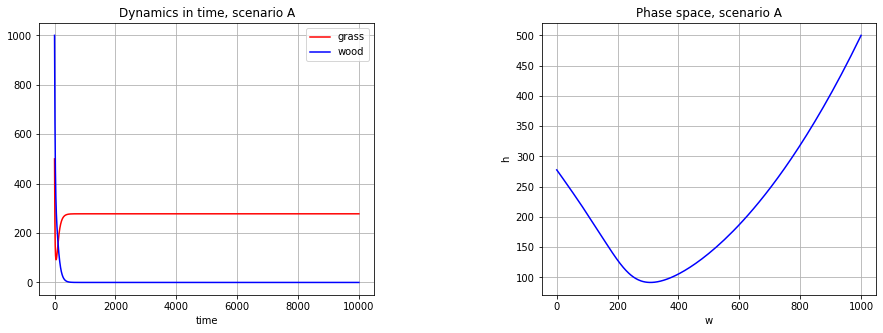

In [15]:
fig = plt.figure(figsize=(15,5))
fig.subplots_adjust(wspace = 0.5, hspace = 0.3)
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.plot(h, 'r-', label='grass')
ax1.plot(w, 'b-', label='wood')
ax1.set_title("Dynamics in time, scenario "+str(scenario))
ax1.set_xlabel("time")
ax1.grid()
ax1.legend(loc='best')

ax2.plot(w, h, color="blue")
ax2.set_xlabel("w")
ax2.set_ylabel("h")  
ax2.set_title("Phase space, scenario "+str(scenario))
ax2.grid()

In [48]:
#brute force method--find w nullclines
null_w=[]    
def find_w_nullclines(h_init,w_init):
    for h in range(h_init,0,-1):
        for w in range(w_init,0,-1):
            if (abs(W_dot(h,w)) < 10**(-2)):
                #print((h,w))
                null_w.append(w)
    return len(null_w)

find_w_nullclines(500,500)

51

In [52]:
#checking brute force method--find h nullclines
null_h=[]

def find_h_nullclines(h_init,w_init):
    for h in range(h_init,0,-1):
        for w in range(w_init,0,-1):
            if (abs(H_dot(h,w)) < 10**(-1)):
                #print((h,w))
                null_h.append(h)
    return len(null_h)
           
find_h_nullclines(500,500)

270

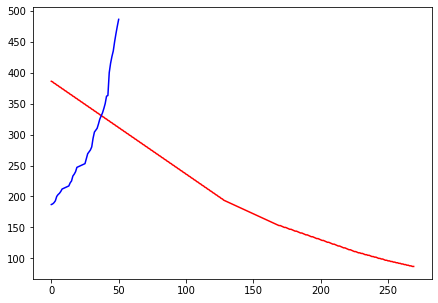

In [53]:
#plot nullclines 

fig = plt.figure(figsize=(15,5))
fig.subplots_adjust(wspace = 0.1, hspace = 0.3)
ax3 = fig.add_subplot(1,2,1)

ax3.plot(null_h, 'r-', label='h nullcline')
ax3.plot(null_w, 'b-', label='w nullcline')

In [56]:
#finding fixed points symbolically
import sympy as sm
# define the system in this way--assuming positive phase space only
# to avoid interference h= x (grass) and w = y (wood) 
x, y = sm.symbols('x, y', negative=False)
xdot = rh*wt*(x)/(x+u*y+p*ws)-dh*x
ydot = rw*(wt*(u*y)/(x+u*y+p*ws)+ws)-dw*y

# use sympy's way of setting equations to zero
xdotEqual = sm.Eq(xdot, 0)
ydotEqual = sm.Eq(ydot, 0)

# compute fixed points
null_h_dot= sm.solve(xdotEqual,x)
null_w_dot=sm.solve(ydotEqual,y)
equilibria = sm.solve( (xdotEqual, ydotEqual), x, y )
print(null_h_dot)
print(null_w_dot)
print(equilibria)

[0.0, 386.666666666667 - 0.6*y]
[-0.833333333333333*x - 0.833333333333333*sqrt(x**2 - 350.0*x + 106225.0) + 245.833333333333, -0.833333333333333*x + 0.833333333333333*sqrt(x**2 - 350.0*x + 106225.0) + 245.833333333333]
[(7.74518382969864e-121, 517.434808128871), (202.051282051282, 307.692307692308)]


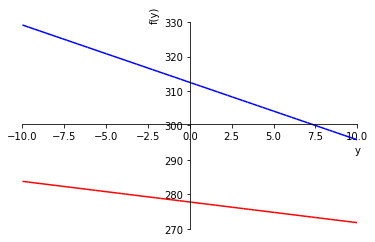

In [68]:
#plot nullclines--this is just way better in desmos, honestly
from sympy.plotting import plot
p1=plot(277.777777777778 - 0.6*y,line_color='r', show=False)
p2=plot(312.5 - 1.66666666666667*x,line_color='b', show=False)
p1.append(p2[0])
p1
p1.show()